Classification and Clustering Work

Importing necessary libraries for the assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.cluster import KMeans

For the first question related to bike reservations

In [2]:
bike = pd.read_csv('bike_data.csv')

bike.head()

,season,month,holiday,weekday,workingday,weather,temp,hum,wind,registered,cnt,day
0,1,1,0,7,0,2,14.110847,80.5833,10.749882,31771,985,1
1,1,1,0,1,0,2,14.902598,69.6087,16.652113,32548,801,1
2,1,1,0,2,1,1,8.050924,43.7273,16.636703,59704,1349,1
3,1,1,0,3,1,1,8.200000,59.0435,10.739832,70635,1562,1
4,1,1,0,4,1,1,9.305237,43.6957,12.522300,73744,1600,1


In [3]:
bike.corr()

,season,month,holiday,weekday,workingday,weather,temp,hum,wind,registered,cnt,day
season,1.000000,0.831032,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.208220,-0.229607,0.410310,0.404584,0.153528
month,0.831032,1.000000,0.018905,0.009523,-0.004688,0.045613,0.219083,0.224937,-0.208013,0.291952,0.278191,0.166910
holiday,-0.010868,0.018905,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.015662,0.006257,-0.109142,-0.068764,0.004536
weekday,-0.003081,0.009523,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.052290,0.014283,0.057427,0.067534,0.000190
workingday,0.013762,-0.004688,-0.252948,0.035800,1.000000,0.060236,0.053470,0.023202,-0.018666,0.305437,0.062542,0.000484
weather,0.021306,0.045613,-0.034395,0.031112,0.060236,1.000000,-0.119503,0.590277,0.039769,-0.259025,-0.295929,-0.011018
temp,0.333361,0.219083,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.128565,-0.158186,0.539436,0.627044,0.081898
hum,0.208220,0.224937,-0.015662,-0.052290,0.023202,0.590277,0.128565,1.000000,-0.248506,-0.089212,-0.098543,0.096106
wind,-0.229607,-0.208013,0.006257,0.014283,-0.018666,0.039769,-0.158186,-0.248506,1.000000,-0.217915,-0.235132,-0.027370
registered,0.410310,0.291952,-0.109142,0.057427,0.305437,-0.259025,0.539436,-0.089212,-0.217915,1.000000,0.945411,0.040821


<AxesSubplot:>

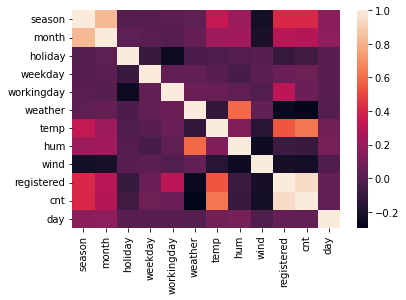

In [4]:
sns.heatmap(bike.corr())

The heat map tries to figure out the correlation between the various data. Since we are looking at the count and registered user are highly correlated while wind has a major negative correlation. Weather is also negatively correlated to registration and count.

<AxesSubplot:xlabel='season', ylabel='cnt'>

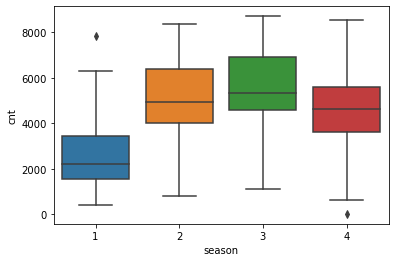

In [5]:
sns.boxplot (x=bike['season'], y=bike['cnt'])

Here we can see that while season 1 (winter) has an impact on the count, but it doesn't necessary mean that season's show a major impact.

<AxesSubplot:xlabel='month', ylabel='cnt'>

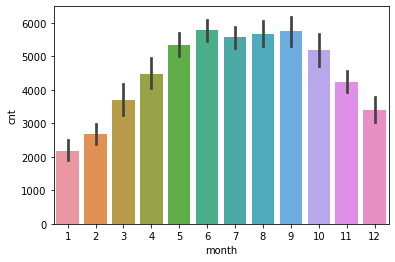

In [6]:
sns.barplot (x=bike['month'], y=bike['cnt'])

Except the coldest months of December, January and February, other months don't have a lot of impact on the count.

<AxesSubplot:xlabel='cnt', ylabel='weather'>

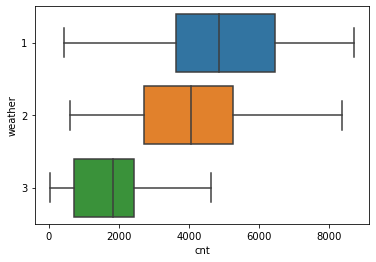

In [7]:
sns.boxplot (x=bike['cnt'], y=bike['weather'], orient='h')

The weather shows that except on weather 3 which is windy, overall the weather in the first 2 cases have some impact on the count.

In [8]:
bike.groupby(['month'])[['cnt']].mean()

,cnt
month,
1,2176.338710
2,2669.964286
3,3692.258065
4,4484.900000
5,5349.774194
6,5772.366667
7,5563.677419
8,5664.419355
9,5766.516667


In [9]:
bike.groupby(['workingday'])[['cnt']].mean()

,cnt
workingday,
0,4330.168831
1,4590.332665


In [10]:
bike.groupby(['holiday'])[['cnt']].mean()

,cnt
holiday,
0,4530.90268
1,3735.00000


In [11]:
bike.groupby(['day'])[['cnt']].mean()

,cnt
day,
1,2139.708333
2,2456.875000
3,3045.000000
4,4278.833333
5,5281.333333
6,5754.791667
7,5542.083333
8,5652.083333
9,5451.875000


In [12]:
bike_x, bike_y = bike.drop(['cnt'], axis=1), bike.cnt 

x2 = sm.add_constant(bike_x)
est_b = sm.OLS(bike_y, x2)
est2_b = est_b.fit()

print(est2_b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1764.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:40:39   Log-Likelihood:                -5343.6
No. Observations:                 730   AIC:                         1.071e+04
Df Residuals:                     718   BIC:                         1.077e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        571.1972    101.554      5.625      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Excluding all the variable with P value more than 0.000 still doesn't impact thte R-squared value by decreasing it from 0.964 to 0.964 so those variables were kept in the figuring out the regression model.

In [13]:
x2 = sm.add_constant(bike_x.drop(['season', 'month', 'weather', 'day', 'holiday', 'weekday', 'wind', 'hum'], axis=1))
est_b = sm.OLS(bike_y, x2)
est2_b = est_b.fit()

print(est2_b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     6078.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:40:39   Log-Likelihood:                -5369.4
No. Observations:                 730   AIC:                         1.075e+04
Df Residuals:                     726   BIC:                         1.077e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        196.6652     45.578      4.315      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


From the above coefficient value, we can see that working day has a negative symbol, which implies that bookings are more frequent on non-working days as compared to working day. In case of temperature since the coefficient is positive, it shows that higher tempereature leads to better booking so booking will be more on days with temperature 25 as compared to days with temperature 20.

For the second question related to marketing campaign for a bank

In [14]:
bank = pd.read_csv('bank.csv')

bank.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,contact_count,previous,outcome
0,58,management,married,tertiary,2143,1,0,5,5,261,1,0,0
1,44,technician,single,secondary,29,1,0,5,5,151,1,0,0
2,33,entrepreneur,married,secondary,2,1,1,5,5,76,1,0,0
3,35,management,married,tertiary,231,1,0,5,5,139,1,0,0
4,28,management,single,tertiary,447,1,1,5,5,217,1,0,0


In [15]:
bank = pd.get_dummies(bank, columns=['job'], drop_first=True, prefix='job')
bank = pd.get_dummies(bank, columns=['marital'], drop_first=True, prefix='mar')
bank = pd.get_dummies(bank, columns=['education'], drop_first=True, prefix='edu')
bank.head()

,age,balance,housing,loan,day,month,duration,contact_count,previous,outcome,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,mar_married,mar_single,edu_secondary,edu_tertiary
0,58,2143,1,0,5,5,261,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,44,29,1,0,5,5,151,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,33,2,1,1,5,5,76,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,35,231,1,0,5,5,139,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,447,1,1,5,5,217,1,0,0,...,0,0,0,0,0,0,0,1,0,1


<AxesSubplot:>

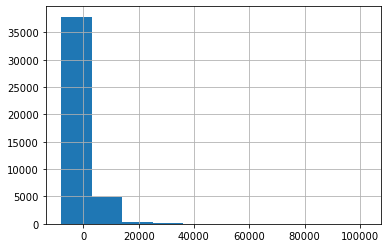

In [16]:
bank.balance.hist()

Looking at the histogram, I have decided to exclude values less than -5000 and more than 30000 as outliers in the model.

In [17]:
bank.drop(bank.loc[bank.balance>30000].index, inplace=True)
bank.drop(bank.loc[bank.balance<-5000].index, inplace=True)
bank

,age,balance,housing,loan,day,month,duration,contact_count,previous,outcome,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,mar_married,mar_single,edu_secondary,edu_tertiary
0,58,2143,1,0,5,5,261,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,44,29,1,0,5,5,151,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,33,2,1,1,5,5,76,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,35,231,1,0,5,5,139,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,447,1,1,5,5,217,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,825,0,0,17,11,977,3,0,1,...,0,0,0,0,1,0,1,0,0,1
43189,71,1729,0,0,17,11,456,2,0,1,...,1,0,0,0,0,0,0,0,0,0
43190,72,5715,0,0,17,11,1127,5,3,1,...,1,0,0,0,0,0,1,0,1,0
43191,57,668,0,0,17,11,508,4,0,0,...,0,0,0,0,0,0,1,0,1,0


<AxesSubplot:>

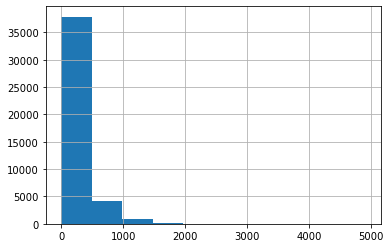

In [18]:
bank.duration.hist(bins=10)

Anything with more than 2000 seconds have been ignored as outliers.

In [19]:
bank.drop(bank.loc[bank.duration>2000].index, inplace=True)
bank

,age,balance,housing,loan,day,month,duration,contact_count,previous,outcome,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,mar_married,mar_single,edu_secondary,edu_tertiary
0,58,2143,1,0,5,5,261,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,44,29,1,0,5,5,151,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,33,2,1,1,5,5,76,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,35,231,1,0,5,5,139,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,447,1,1,5,5,217,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,825,0,0,17,11,977,3,0,1,...,0,0,0,0,1,0,1,0,0,1
43189,71,1729,0,0,17,11,456,2,0,1,...,1,0,0,0,0,0,0,0,0,0
43190,72,5715,0,0,17,11,1127,5,3,1,...,1,0,0,0,0,0,1,0,1,0
43191,57,668,0,0,17,11,508,4,0,0,...,0,0,0,0,0,0,1,0,1,0


<AxesSubplot:>

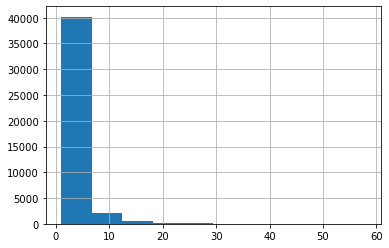

In [20]:
bank.contact_count.hist(bins=10)

Contact count more than 30 have been removed as outliers for this data.

In [21]:
bank.drop (bank.loc[bank.contact_count>30].index, inplace=True)
bank

,age,balance,housing,loan,day,month,duration,contact_count,previous,outcome,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,mar_married,mar_single,edu_secondary,edu_tertiary
0,58,2143,1,0,5,5,261,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,44,29,1,0,5,5,151,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,33,2,1,1,5,5,76,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,35,231,1,0,5,5,139,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,447,1,1,5,5,217,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,825,0,0,17,11,977,3,0,1,...,0,0,0,0,1,0,1,0,0,1
43189,71,1729,0,0,17,11,456,2,0,1,...,1,0,0,0,0,0,0,0,0,0
43190,72,5715,0,0,17,11,1127,5,3,1,...,1,0,0,0,0,0,1,0,1,0
43191,57,668,0,0,17,11,508,4,0,0,...,0,0,0,0,0,0,1,0,1,0


In [22]:
xtrain, xtest, ytrain, ytest = train_test_split (bank.drop(['outcome'], axis=1),bank.outcome, test_size=0.25, random_state=0)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(xtrain, ytrain)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [23]:
import statsmodels.api as sm
logisticmodel = sm.Logit(ytrain, xtrain)
report = logisticmodel.fit()
print(report.summary())

Optimization terminated successfully.
         Current function value: 0.271555
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                32273
Model:                          Logit   Df Residuals:                    32250
Method:                           MLE   Df Model:                           22
Date:                Sun, 03 Apr 2022   Pseudo R-squ.:                  0.2420
Time:                        19:40:42   Log-Likelihood:                -8763.9
converged:                       True   LL-Null:                       -11562.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                  -0.0264      0.002    -14.839      0.000      -0.030      -0.023
balance 

In [24]:
y_predict = model.predict(xtest)
y_predict[:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [25]:
mar = confusion_matrix (ytest, y_predict)
print (mar)

[[9323  187]
 [ 975  273]]


In [26]:
report = classification_report(ytest, y_predict)

print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9510
           1       0.59      0.22      0.32      1248

    accuracy                           0.89     10758
   macro avg       0.75      0.60      0.63     10758
weighted avg       0.87      0.89      0.87     10758



The accuracy of the model in the test set can be seen at 89% from the classification performance matrix.

While the model can mostly define positive values, a lot of negative values have also been assigned as positive providing a lot of false positive. The sensitivity of the model is high but the precision is a bit low. The number of false positive are 975 which is more than 10% of the positive prediction of the model. While only 187 positive cases are defined as negative which wouldn't have a major impact as it is just around 1% of the overall positive cases.

For the third question related to patients

In [27]:
patient = pd.read_csv('patients.csv')

patient.head()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1


In [28]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             303 non-null    int64
 1   gender          303 non-null    int64
 2   pain            303 non-null    int64
 3   blood_pressure  303 non-null    int64
 4   cholesterol     303 non-null    int64
 5   blood_sugar     303 non-null    int64
 6   heart_rate      303 non-null    int64
 7   exercise        303 non-null    int64
 8   outcome         303 non-null    int64
dtypes: int64(9)
memory usage: 21.4 KB


In [29]:
patient_info = patient.drop(['outcome'], axis=1)
patient_scaled = patient_info.apply(lambda x: preprocessing.scale(x))
patient_scaled

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,0.015443,-0.696631
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,1.633471,-0.696631
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,0.977514,-0.696631
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,1.239897,-0.696631
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.583939,1.435481
...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,-1.165281,1.435481
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,-0.771706,-0.696631
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,-0.378132,-0.696631
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,-1.515125,1.435481


Using scalar to scale the dataset to a certain variable as there are variables with gender being 0 or 1 while values like heart rate, cholesterol and blood pressure can have values more than 150 to 300 or even more.

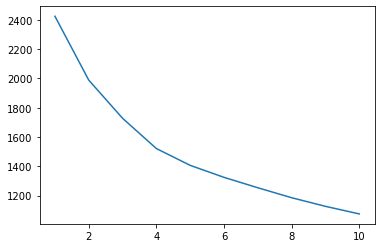

In [30]:
standerrclus = []

for i in range (1,11):
    kmeans = KMeans (n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(patient_scaled)
    standerrclus.append (kmeans.inertia_)

plt.plot (range(1,11), standerrclus)
plt.show()


From the elbow diagram, 4 has been identified as the number of clusters which would give a reasonable cluster with reasonable standard error.

In [31]:
kmeans = KMeans (n_clusters=4, init='k-means++', random_state=0)

ycluster = kmeans.fit_predict(patient_scaled)

In [32]:
ycluster

array([0, 2, 2, 2, 1, 3, 3, 2, 0, 2, 3, 3, 2, 1, 0, 2, 3, 3, 2, 3, 3, 2,
       2, 0, 2, 3, 0, 2, 0, 0, 2, 3, 2, 2, 1, 2, 0, 2, 3, 3, 3, 2, 1, 3,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 0, 2, 2, 2, 0, 2,
       1, 2, 2, 3, 2, 2, 2, 1, 2, 3, 0, 1, 0, 1, 2, 2, 3, 0, 2, 3, 3, 0,
       2, 3, 0, 1, 2, 0, 2, 1, 3, 0, 2, 0, 2, 3, 3, 0, 2, 3, 0, 1, 2, 2,
       3, 0, 3, 2, 3, 2, 2, 2, 2, 1, 3, 3, 2, 2, 2, 2, 2, 3, 2, 1, 3, 3,
       2, 2, 2, 3, 0, 0, 1, 1, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3,
       2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 1, 1, 3, 3, 0, 0, 2, 3, 2, 1, 1,
       0, 3, 1, 1, 1, 3, 3, 2, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 2, 0,
       1, 3, 2, 1, 1, 0, 3, 1, 1, 3, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 3, 0,
       3, 1, 0, 0, 1, 1, 3, 1, 3, 1, 2, 0, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1,
       3, 1, 1, 2, 1, 1, 3, 3, 1, 0, 0, 1, 3, 1, 1, 1, 1, 2, 0, 2, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 3, 1, 2, 1, 2, 1, 3, 0, 1, 1, 0, 0, 2, 1, 1,
       2, 3, 1, 1, 3, 3, 0, 3, 1, 1, 1, 0, 1, 2, 0,

In [33]:
patient.groupby(ycluster).mean()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,57.000000,0.733333,1.200000,139.066667,247.911111,1.0,149.177778,0.355556,0.511111
1,56.569620,0.822785,0.215190,131.177215,249.506329,0.0,131.430380,0.962025,0.189873
2,45.927835,0.752577,1.391753,123.360825,227.309278,0.0,165.340206,0.061856,0.773196
3,60.780488,0.439024,1.060976,137.743902,264.658537,0.0,148.890244,0.012195,0.634146


The average value for pain has reasonable differences ranging from 0.2, 1.06, 1.2 and 1.39.

The blood sugar is 1 more a particular group while all others have 0 as the value.

In case of exercise group 3 and 4 have value of 0.01 and 0.06 which is lower chest pain induced by exercise while 0.35 is around where some cases have heartaches while in case of group 2, there were many people with chest pain induced by exercise which is almost 96% of the people.

In [34]:
kmeans2 = KMeans (n_clusters=2, init='k-means++', random_state=0)

ycluster2 = kmeans2.fit_predict(patient_scaled)

ycluster2

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [35]:
patient.groupby(ycluster2).mean()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,52.868687,0.631313,1.388889,129.388889,242.878788,0.126263,159.101010,0.045455,0.747475
1,57.190476,0.780952,0.171429,135.838095,252.647619,0.190476,131.819048,0.857143,0.161905


In [36]:
pd.crosstab(patient['outcome'],ycluster)

col_0,0,1,2,3
outcome,,,,
0,22,64,22,30
1,23,15,75,52


In [37]:
pd.crosstab(patient['outcome'], ycluster2)

col_0,0,1
outcome,,
0,50,88
1,148,17


In case of actual outcome and the cluster we see that the clusters with four different clusters do not completely identify if the outcome is related to which cluster they belong to while in case of where there are 2 cluster also the cases are similar where the cluster isn't related closely to the actual outcome either. So both these clusters are mix of not healthy and healthy patients.